# interpolating / extrapolating density

when we don't have the desnity at a temp we need, we need to interpolate, and maybe extrapolate the values.

## Linear Interpolation

interpolating from 2 points is fairly straightforward:

y = y1 + ((x – x1) / (x2 – x1)) * (y2 – y1)

where x is the known value, y is the unknown value, x1 and y1 are the coordinates that are below the known x value, and x2 and y2 are the coordinates that are above the x value.


## Exponential interpolation

If the density is an exponential function of temp, then you can transform the data, do liniear interpolation, and then transform back:

y = exp ( ln(y1) + ((x – x1) / (x2 – x1)) * (ln(y2) – ln(y1)))

For the ECCC case:

x1 = 0.0 C
x2 = 15.0 C
x = 15.56

So this simplifies to:

y = exp (ln(y1) + ((15.56 / 15.0) * (ln(y2) – ln(y1))))

And then some re-arranging:

y = exp (ln(y1) + ((ln(y2) – ln(y1)) * 15.56 / 15.0))

and renaming:

y = exp(ln(rho_0) + ((ln(rho_15) – ln(rho_0)) * 15.56 / 15.0))



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
def linear(x1, y1, x2, y2):
    def fun(x):
        return y1 + ((x - x1) / (x2 - x1)) * (y2 - y1)
    return fun

def exponential(x1, y1, x2, y2):
    def fun(x):
#        return np.exp(np.log(y1) + ((x - x1) / (x2 - x1)) * (np.log(y2) - np.log(y1)))
        return np.exp(np.log(y1) + (np.log(y2) - np.log(y1)) * ((x - x1) / (x2 - x1)))
    return fun

# ECCC equation:

def ecc_density_at_60F(rho_0, rho_15):
    # return (rho_0 * (np.exp(np.log(rho_15) - np.log(rho_0) / 15.0 * 15.56)))
    return rho_0 * np.exp(((np.log(rho_15)- np.log(rho_0)) * 15.56 / 15.0))

def ecc_density_at_60F_old(rho_0, rho_15):
    C16 = rho_0
    H16 = rho_15
    EXP = np.exp
    LN = np.log
    return    C16 * EXP(     LN(H16) - LN(C16) * 15.56 / 15.0)
    #return rho_0 * np.exp(((np.log(rho_15)- np.log(rho_0)) * 15.56 / 15.0))

# d1 = ecc_density_at_60F(0.9, 0.8)
# d2 = ecc_density_at_60F_old(0.9, 0.8)
# assert d1 == d2, f"{d1}, {d2}"



Text(0.5, 1.0, 'Zoomed in on 15.56')

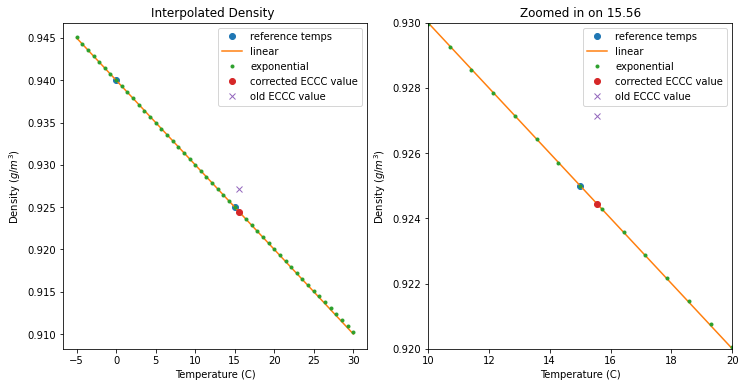

In [7]:
t1 = 0.0
t2 = 15.0

rho1 = 0.94
rho2 = 0.925

lin = linear(t1, rho1, t2, rho2)
exp = exponential(t1, rho1, t2, rho2)

t = np.linspace(-5, 30)
rho_lin = lin(t)
rho_exp = exp(t)

# ECC eq
rho_ecc_old = ecc_density_at_60F_old(rho1, rho2)
rho_ecc = ecc_density_at_60F(rho1, rho2)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

for ax in (ax1, ax2):

    ax.plot((t1, t2), (rho1, rho2), 'o',
             t, rho_lin, '-',
             t, rho_exp, '.',
             15.56, rho_ecc, 'o',
             15.56, rho_ecc_old, 'x')
    ax.legend(['reference temps','linear','exponential', 'corrected ECCC value','old ECCC value'])
    ax.set_title("Interpolated Density ")
    ax.set_xlabel("Temperature (C)")
    ax.set_ylabel("Density ($g/m^3$)")

ax2.set_xlim(10, 20)
ax2.set_ylim(0.92, 0.93)
ax2.set_title("Zoomed in on 15.56")


## Result:

There is very little difference between linear and exponential interpolation / extrapolation over the environmentally relevent range.